<a href="https://colab.research.google.com/github/Yukyung0622/Colab/blob/master/Ch01.%ED%8C%8C%EC%9D%B4%EC%8D%AC%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D%20%EA%B8%B0%EC%B4%88/6_%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
"""
날짜 : 2022/04/27
이름 : 김유경
내용 : 파이썬 데이터분석 실습하기
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#데이터 불러오기
df_koweps = pd.read_csv('/content/drive/MyDrive/파이썬 데이터 과학 실습/file/koweps_2015.csv', encoding='euc-kr')
df_koweps

,Unnamed: 0,h10_id,h10_ind,h10_sn,h10_merkey,h_new,h10_cobf,h10_reg5,h10_reg7,h10_din,...,c1007_4aq19,c1007_4aq20,c1007_4aq21,c1007_4aq22,c1007_4aq23,h10_pers_income1,h10_pers_income2,h10_pers_income3,h10_pers_income4,h10_pers_income5
0,1,1,1,1,10101,0.0,NaN,1,1,864.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,2,2,1,1,20101,0.0,NaN,1,1,600.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,3,3,1,1,30101,0.0,NaN,1,1,1571.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1440.0,NaN,0.0,NaN
3,4,4,1,1,40101,0.0,NaN,1,1,3579.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2400.0,NaN,0.0,NaN
4,5,4,1,1,40101,0.0,NaN,1,1,3579.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16659,16660,9800,7,1,98000701,1.0,NaN,4,5,9764.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
16660,16661,9800,7,1,98000701,1.0,NaN,4,5,9764.0,...,NaN,NaN,NaN,NaN,NaN,3630.0,NaN,NaN,0.0,NaN
16661,16662,9800,7,1,98000701,1.0,NaN,4,5,9764.0,...,NaN,NaN,NaN,NaN,NaN,NaN,700.0,NaN,0.0,NaN
16662,16663,9800,7,1,98000701,1.0,NaN,4,5,9764.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN


In [8]:
#데이터 크기확인
df_koweps.shape

(16664, 958)

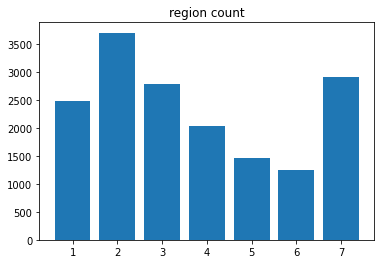

In [9]:
################################################################
#분석주제1.지역별 인구수 분석(지역컬럼:h10_reg7 = 1.서울, 2:경기/인천, 3:부산/경남, 4:대구/경북, 5:대전/충남, 6:강원/충북, 7:광주/전남/전북/제주)
df_local = df_koweps.loc[:,['h10_reg7']]

counts = []
for i in range(1, 8):
  count = df_local[df_local.h10_reg7 == i].h10_reg7.count()
  counts.append(count)

counts

#시각화
plt.title('region count')
plt.bar(['1', '2', '3', '4', '5', '6', '7'],counts)
plt.show()

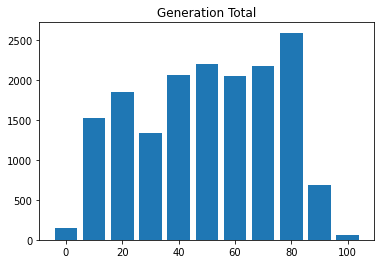

In [34]:
################################################################
#분석주제2.나이대 별 인구분석(나이컬럼:h10_g4)
df_age = df_koweps.loc[:,['h10_g4', 'h10_g11']]

#파생변수 age, gen 생성
df_age['age'] = 2022 - df_age['h10_g4'];
# df_age['age'] = 2022 - df_age.h10_g4;  <- 위에꺼랑 똑같은 결과값 나옴
df_age

df_age['gen'] = [0 if 0  <= a < 10 else
                10 if 10 <= a < 20 else 
                20 if 20 <= a < 30 else 
                30 if 30 <= a < 40 else 
                40 if 40 <= a < 50 else 
                50 if 50 <= a < 60 else 
                60 if 60 <= a < 70 else 
                70 if 70 <= a < 80 else 
                80 if 80 <= a < 90 else 
                90 if 90 <= a < 100 else 100 for a in df_age['age']]
df_result = df_age.groupby(by='gen', as_index=False)['h10_g4'].count().rename(columns={'h10_g4':'total'})
df_result

# 시각화
plt.title('Generation Total')
plt.bar(df_result['gen'], df_result['total'], width = 8)
plt.show()


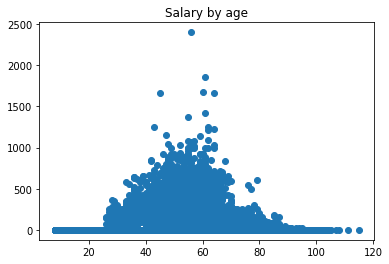

In [35]:
################################################################
#분석주제3.나이대 별 소득분포(소득컬럼:p1002_8aq1)
df_income=df_koweps.loc[:, ['h10_g3', 'h10_g4', 'h10_eco9', 'p1002_8aq1']]
df_income.columns =['gender', 'birth', 'job', 'salary']
df_income

#결측치 처리
df_income = df_income.fillna(0)

#나이 파생변수 추가
df_income['age'] = 2022 - df_income.birth
df_income

#시각화
plt.title('Salary by age')
plt.scatter(df_income['age'], df_income['salary'])
plt.show()

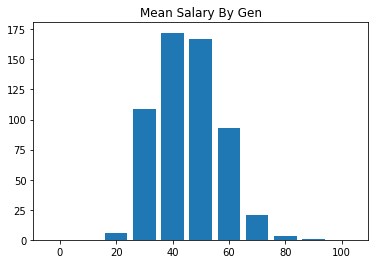

In [36]:
#####################################################################
# 분석주제 3-1. 나이대 별 소득분포(소득컬럼:p1002_8aq1)
df_income = df_koweps.loc[:, ['h10_g3', 'h10_g4', 'h10_eco9', 'p1002_8aq1']]
df_income.columns = ['gender', 'birth', 'job', 'salary']
df_income

# 결측치 처리
df_income = df_income.fillna(0)

# gen, age 파생변수 추가
df_income['age'] = 2022 - df_income.birth
df_income

df_income['gen'] = [0 if 0  <= a < 10 else
                10 if 10 <= a < 20 else 
                20 if 20 <= a < 30 else 
                30 if 30 <= a < 40 else 
                40 if 40 <= a < 50 else 
                50 if 50 <= a < 60 else 
                60 if 60 <= a < 70 else 
                70 if 70 <= a < 80 else 
                80 if 80 <= a < 90 else 
                90 if 90 <= a < 100 else 100 for a in df_income['age']]
df_income_mean = df_income.groupby('gen')['salary'].mean().reset_index()
df_income_mean


# 시각화
plt.title('Mean Salary By Gen')
plt.bar(df_income_mean['gen'], df_income_mean['salary'], width = 8)
plt.show()